# Playstore scrapper for spanish sentiment dataset creation 

This notebook contains the process of scrapping reviews from the google playstore and creating a dataset for sentiment analysis

<img src="https://www.tuexpertoapps.com/wp-content/uploads/2019/05/google-play-store-ninos-01.jpg.webp" width=150>
<img src="https://miro.medium.com/max/4080/1*tVyeL2WXyH7tQHC4htG4nw.png" width=150>

## Loading libraries

In [1]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
import random

from google_play_scraper import Sort, reviews, app

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

### If the link is https://play.google.com/store/apps/details?id=com.netflix.mediaclient&gl=ES then the id is 'com.netflix.mediaclient'

In [2]:

app_packages = [
    'com.anydo',
    'com.todoist',
    'com.ticktick.task',
    'com.habitrpg.android.habitica',
    'cc.forestapp',
    'com.oristats.habitbull',
    'com.levor.liferpgtasks',
    'com.habitnow',
    'com.microsoft.todos',
    'com.netflix.mediaclient'
]

## Scrapping the reviews and saving them on a list of dicts

In [ ]:
app_reviews = []

for ap in tqdm(app_packages):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
            ap,
            lang='es',
            sort=sort_order,
            count= 200 if score == 3 else 100,
            filter_score_with=score
          )
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
                app_reviews.extend(rvs)

In [4]:
len(app_reviews)

1056410

In [12]:
app_reviews[0]

{'reviewId': 'gp:AOqpTOFgo8wJoq5FhyZ9JSMaB6UkoAaCsaUFzYuYKjkpEkfzogqF_GIeQjceHwEjFQ_3jmu2IgMhPQ8aT9uMfg',
 'userName': 'María Gissela Correa',
 'userImage': 'https://lh3.googleusercontent.com/a-/AOh14GhAVbV1y2iUBzShQ5H11QU_cvkcZGKftBF4_cvWzw',
 'content': 'Hola yo pague por premium y me cobraron y todo pero no puedo utilizar mi cuenta premium, solo tengo la que es gratis, y no se que hacer porque la pague por un año pero no me deja entrar a la premium, alguien me podría ayudar con esto😟?',
 'score': 1,
 'thumbsUpCount': 1,
 'reviewCreatedVersion': '5.4.0.6',
 'at': datetime.datetime(2020, 9, 9, 13, 35, 4),
 'replyContent': 'Please email us at Premium@any.do and we will fix it ASAP :)',
 'repliedAt': datetime.datetime(2020, 9, 10, 2, 12, 6),
 'sortOrder': 'most_relevant',
 'appId': 'com.anydo'}

### Creating lists of content and scores 

In [13]:
contents = []
scores = []
for ap in app_reviews:
    contents.append(ap["content"])
    scores.append(ap["score"])

## We can see its an unbalanced dataset

/home/davinchi/Documents/google_play_scrapper/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


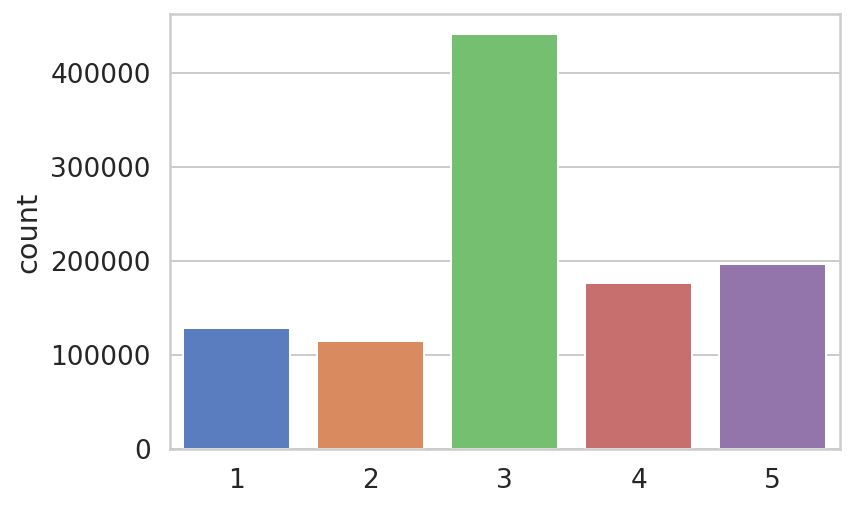

In [14]:
sns.countplot(scores)
plt.show()

## We map the categories into low, medium and high sentiment

In [17]:
sent_dict = {
    1:"bajo",
    2:"bajo",
    3:"neutro",
    4:"alto",
    5:"alto"
}
sentiment = list(map(sent_dict.get, scores))
df = pd.DataFrame({"contenido":contents, "sentimiento":sentiment})

### Still unbalanced

/home/davinchi/Documents/google_play_scrapper/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


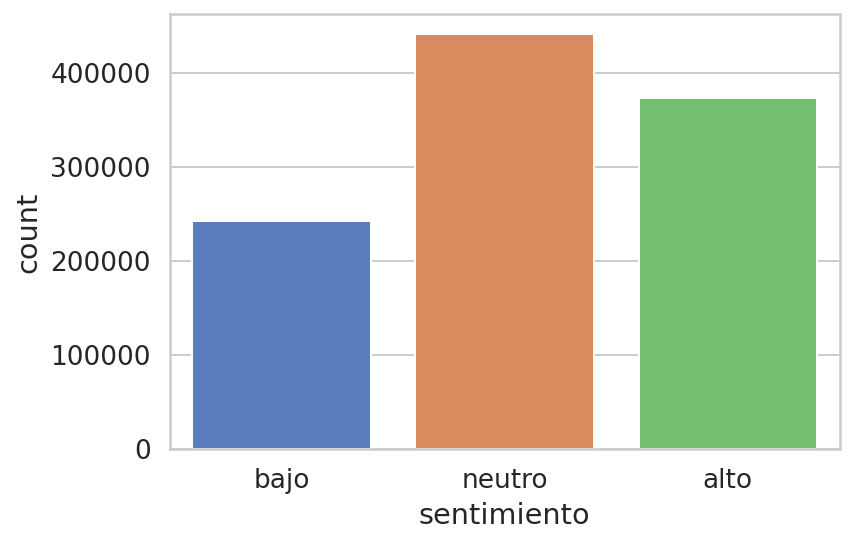

In [18]:
sns.countplot(df["sentimiento"])
plt.show()

## We balance the dataset

In [20]:
df_sample = df.groupby('sentimiento', group_keys=False).apply(lambda x: x.sample(min(len(x), 33000)))

/home/davinchi/Documents/google_play_scrapper/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


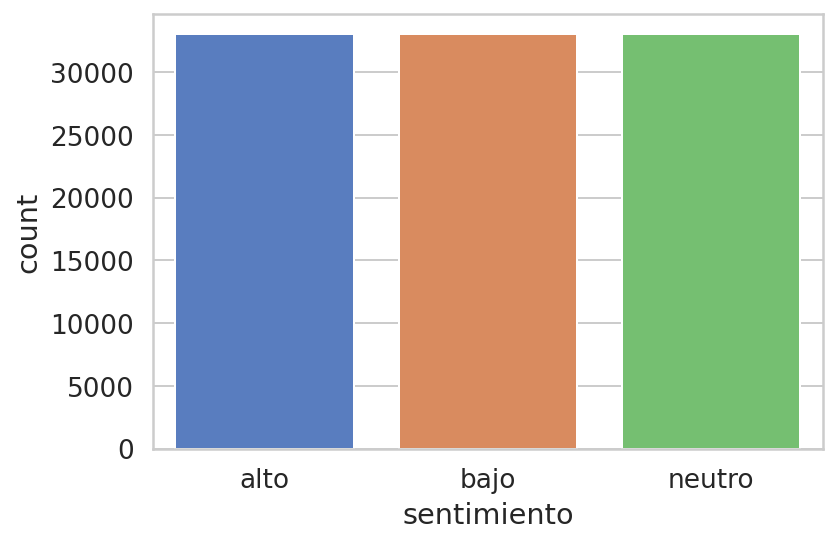

In [21]:
sns.countplot(df_sample["sentimiento"])
plt.show()

In [22]:
df_sample

,contenido,sentimiento
867547,Echo de menos las subtareas que tenía la aplic...,alto
399559,He encontrado un fallo. En el widget de Androi...,alto
679351,"Muy buena app, me encanta los detalles que tie...",alto
1019622,Esta muy buena la app pero ultimamente me esta...,alto
565943,Es una excelente herramienta adaptando el méto...,alto
...,...,...
211866,"I would rate 5 stars, but widget started to ma...",neutro
795128,Me gustaba mas cuando era wunderlist mejor ya ...,neutro
48159,Cool,neutro
100916,No me llegan las notificaciones!! Pongo record...,neutro


In [23]:
df_sample.to_csv("reviews.csv")